<a href="https://colab.research.google.com/github/kavyas2003/COSMOSColab/blob/main/kavyamalariaprojectv7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import keras
#import the layers used to build the neural network layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#connect to drive to access data

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#preprocess the images for data


train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=16,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/train',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/test',
         target_size=(150,150),
         batch_size=16,
         class_mode='binary')

print(type(train_generator))
       
  #preprocess the images to normalize the data 


Found 3214 images belonging to 2 classes.
Found 3214 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [ ]:
Dense = keras.layers.Dense #build the neural network and create all the layers 
Sequential = keras.Sequential
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (150 , 150, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(16, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

W0726 04:47:56.145720 139878159062912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 04:47:56.173550 139878159062912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 04:47:56.177875 139878159062912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 04:47:56.200733 139878159062912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #train the model 
               # Train the model, iterating on the data in batches of 32 samples

history = classifier.fit_generator(train_generator,
          steps_per_epoch = 50,
          epochs = 10,
          validation_steps = 100, validation_data = validation_generator)
 #run the model on the validation data to test for accuracy 



Epoch 1/10
50/50 [==============================] - 247s 5s/step - loss: 0.6723 - acc: 0.5975 - val_loss: 0.6278 - val_acc: 0.6619
Epoch 2/10
50/50 [==============================] - 33s 660ms/step - loss: 0.6453 - acc: 0.6500 - val_loss: 0.5858 - val_acc: 0.7090
Epoch 3/10
50/50 [==============================] - 27s 541ms/step - loss: 0.6209 - acc: 0.6700 - val_loss: 0.6082 - val_acc: 0.6606
Epoch 4/10
50/50 [==============================] - 27s 538ms/step - loss: 0.5781 - acc: 0.7155 - val_loss: 0.5412 - val_acc: 0.7397
Epoch 5/10
50/50 [==============================] - 27s 538ms/step - loss: 0.5247 - acc: 0.7588 - val_loss: 0.4898 - val_acc: 0.7906
Epoch 6/10
50/50 [==============================] - 27s 549ms/step - loss: 0.5257 - acc: 0.7863 - val_loss: 0.5839 - val_acc: 0.7153
Epoch 7/10
50/50 [==============================] - 29s 583ms/step - loss: 0.4978 - acc: 0.8013 - val_loss: 0.4189 - val_acc: 0.8050
Epoch 8/10
50/50 [==============================] - 29s 588ms/step - lo

In [ ]:
result = classifier.evaluate_generator(generator = validation_generator, steps=50)
print( "Accuracy is:", result[1])
print( "Loss is:", result[0])

Accuracy is: 0.85875
Loss is: 0.43300108805298804


In [ ]:
result = classifier.evaluate_generator(generator = test_generator, steps=50)
print( "Accuracy is:", result[1])
print( "Loss is:", result[0])

#evaluate and print the loss and the accuracy

Accuracy is: 0.8421717171717171
Loss is: 0.6698626270799926


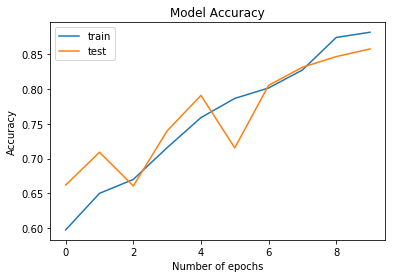

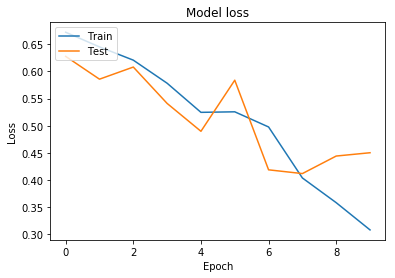

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#see the model's history and performance on the validation data
#print the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()